## ARIMA MODELS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score as r2_score
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.ar_model import ar_select_order
from sklearn.metrics import r2_score
from statsmodels.tsa.arima.model import ARIMA

In [3]:
df_MIDB = pd.read_csv('BINARYTABLE.csv', sep=";")
# df_MIDB = pd.read_csv('frequencyMID.csv', sep=";")

In [6]:
df_MIDB

,YEAR,AAB,AFG,ALB,ALG,ANG,ARG,ARM,AUH,AUL,...,VEN,VTM,WRT,YAR,YEM,YPR,YUG,ZAI,ZAM,ZIM
0,1816,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1817,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1818,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1819,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1820,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,2010,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
195,2011,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
196,2012,0,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
197,2013,0,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0


In [8]:
country = 'USA'

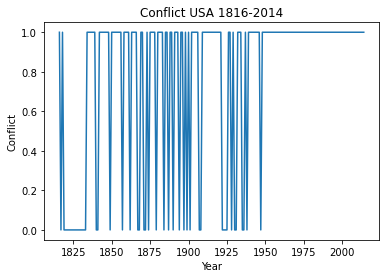

In [9]:
plt.plot(df_MIDB['YEAR'], df_MIDB[country])
plt.title('Conflict ' + country + ' 1816-2014')
plt.xlabel('Year') 
plt.ylabel('Conflict')
plt.savefig(country + 'confl_data.png')
plt.show()



## ACF & PACF

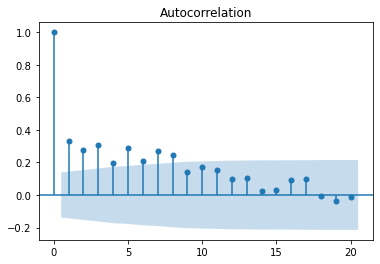

<Figure size 432x288 with 0 Axes>

In [10]:
acf = plot_acf(df_MIDB[country], lags=20)
plt.show(acf)
plt.savefig(country + ' ACF.png')


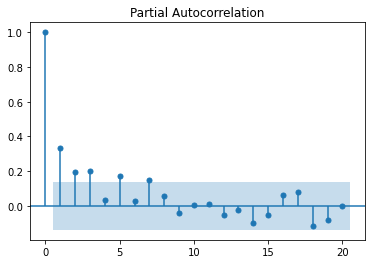

<Figure size 432x288 with 0 Axes>

In [11]:
plot_pacf(df_MIDB[country], lags=20)
plt.show()
plt.savefig(country + ' PACF.pdf')


## Stationarity Test ADF

In [12]:
class StationarityTests:
    def __init__(self, significance=.05):
        self.SignificanceLevel = significance
        self.pValue = None
        self.isStationary = None
        
    def ADF_Stationarity_Test(self, timeseries, printResults = True):
        #Dickey-Fuller test:
        adfTest = adfuller(timeseries, autolag='AIC')
        
        self.pValue = adfTest[1]
        
        if (self.pValue<self.SignificanceLevel):
            self.isStationary = True
        else:
            self.isStationary = False
        
        if printResults:
            dfResults = pd.Series(adfTest[0:4], index=['ADF Test Statistic','P-Value','# Lags Used','# Observations Used'])
            #Add Critical Values
            for key,value in adfTest[4].items():
                dfResults['Critical Value (%s)'%key] = value
            print('Augmented Dickey-Fuller Test Results:')
            print(dfResults)

In [13]:
sTest = StationarityTests(significance=0.05)
sTest.ADF_Stationarity_Test(df_MIDB[country], printResults = True)
print("Is the {} time series stationary? {}".format(country, sTest.isStationary))
print()

Augmented Dickey-Fuller Test Results:
ADF Test Statistic       -3.044462
P-Value                   0.030946
# Lags Used               6.000000
# Observations Used     192.000000
Critical Value (1%)      -3.464875
Critical Value (5%)      -2.876714
Critical Value (10%)     -2.574859
dtype: float64
Is the USA time series stationary? True



## AR

                            AutoReg Model Results                             
Dep. Variable:                    USA   No. Observations:                  199
Model:              Restr. AutoReg(4)   Log Likelihood                -104.017
Method:               Conditional MLE   S.D. of innovations              0.413
Date:                Mon, 05 Apr 2021   AIC                             -1.740
Time:                        21:59:04   BIC                             -1.690
Sample:                             4   HQIC                            -1.720
                                  199                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6170      0.060     10.255      0.000       0.499       0.735
USA.L4         0.2005      0.069      2.904      0.004       0.065       0.336
                                    Roots           

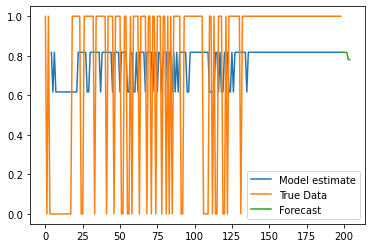

199    0.817568
200    0.817568
201    0.817568
202    0.817568
203    0.780981
204    0.780981
dtype: float64


In [14]:
lags = [4]
res = AutoReg(df_MIDB[country], lags=lags, old_names=False).fit()
print(res.summary())


forecast = res.predict(start= len(df_MIDB), end=len(df_MIDB) + 5)
model_estimate = res.predict(start= 0, end=len(df_MIDB))

plt.plot(model_estimate)
plt.plot(df_MIDB[country])
plt.plot(forecast)
plt.legend(["Model estimate", "True Data", "Forecast"])
plt.show()
print(forecast)

## ARIMA with lags from plots ACF, PACF

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                                   SARIMAX Results                                   
Dep. Variable:                           USA   No. Observations:                  199
Model:             ARIMA([1, 3, 4, 5], 0, 6)   Log Likelihood                 -85.146
Date:                       Mon, 05 Apr 2021   AIC                            194.293
Time:                               21:59:06   BIC                            233.812
Sample:                                    0   HQIC                           210.287
                                       - 199                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7173      0.351      2.045      0.041       0.030       1.405
ar.L1         -0.0631      0.148     -0.425      0.671      -0.354       0.

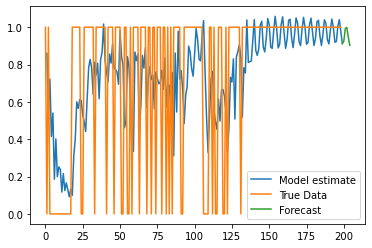

r2: 0.411272


199    0.912086
200    0.924499
201    0.993116
202    0.998936
203    0.946613
204    0.903017
Name: predicted_mean, dtype: float64

In [15]:
country_arima = df_MIDB[country]

model_arima = ARIMA(country_arima, order = ([1,3,4,5],0,[1,2,3,4,5,6])).fit()
print(model_arima.summary())


forecast_arima = model_arima.predict(start= len(df_MIDB), end=len(df_MIDB) + 5)
arima_estimate = model_arima.predict(start= 1, end=len(df_MIDB))


plt.plot(arima_estimate)
plt.plot(country_arima)
plt.plot(forecast_arima)
plt.legend(["Model estimate", "True Data", "Forecast"])
plt.show()
from sklearn.metrics import r2_score
r2 = r2_score(country_arima,arima_estimate)
print('r2: %f' % r2)
forecast_arima

## ARIMA with arbitrary initial lags = 5

                                  SARIMAX Results                                   
Dep. Variable:                          USA   No. Observations:                  199
Model:             ARIMA([3], 1, [1, 3, 4])   Log Likelihood                 -91.245
Date:                      Mon, 05 Apr 2021   AIC                            192.490
Time:                              21:59:07   BIC                            208.932
Sample:                                   0   HQIC                           199.145
                                      - 199                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L3         -0.2889      0.637     -0.454      0.650      -1.536       0.959
ma.L1         -0.8216      0.044    -18.868      0.000      -0.907      -0.736
ma.L

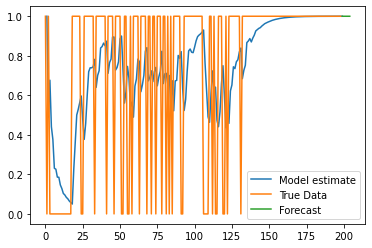

r2: 0.456333


199    0.999934
200    0.999929
201    0.999926
202    0.999921
203    0.999923
204    0.999924
Name: predicted_mean, dtype: float64

<Figure size 432x288 with 0 Axes>

In [16]:
country_arima = df_MIDB[country]

model_arima = ARIMA(country_arima, order = ((0,0,1,0,0),1,(1,0,1,1,0))).fit()
print(model_arima.summary())


forecast_arima = model_arima.predict(start= len(df_MIDB), end=len(df_MIDB) + 5)
arima_estimate = model_arima.predict(start= 1, end=len(df_MIDB))


plt.plot(arima_estimate)
plt.plot(country_arima)
plt.plot(forecast_arima)
plt.legend(["Model estimate", "True Data", "Forecast"])
plt.show()
plt.savefig(country + 'arma_pred.png')

from sklearn.metrics import r2_score
r2 = r2_score(country_arima,arima_estimate)
print('r2: %f' % r2)
forecast_arima